## 📊 1. Data Collection

### Data Sources:
- **Primary**: Kaggle Crop Recommendation Dataset
- **Secondary**: Agricultural research papers on micronutrient deficiencies
- **Tertiary**: Government soil health data patterns

### Dataset Overview:
- **Focus**: Soil nutrition parameters (N, P, K, pH, environmental factors)
- **Scope**: Indian agricultural conditions
- **Purpose**: Identify nutrition deficiency patterns in soil-crop systems

In [ ]:
# Import required libraries for data collection and preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('default')
sns.set_palette("husl")

print("🌱 SOIL & CROP NUTRITION DEFICIENCY ANALYSIS SYSTEM")
print("Week 1: Data Collection and Preprocessing")
print("=" * 60)

🌱 SOIL & CROP NUTRITION DEFICIENCY ANALYSIS SYSTEM
Week 1: Data Collection and Preprocessing


In [ ]:
# !pip install kaggle
# import os

# # Create a directory for Kaggle credentials
# !mkdir ~/.kaggle

# # Copy the kaggle.json file to the created directory
# # Make sure you have uploaded your kaggle.json file to your Colab environment
# !cp kaggle.json ~/.kaggle/

# # Set permissions for the kaggle.json file
# !chmod 600 ~/.kaggle/kaggle.json

# # Download the dataset
# !kaggle datasets download -d atharvaingle/crop-recommendation-dataset

# # Unzip the dataset
# !unzip crop-recommendation-dataset.zip

In [ ]:
df_raw = pd.read_csv('Crop_recommendation.csv')
df_raw.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
# Loading the crop recommendation dataset
try:
    df_raw = pd.read_csv('Crop_recommendation.csv')
    print(f"Dataset loaded successfully")
    print(f"Dataset shape: {df_raw.shape}")
    print(f"Columns: {list(df_raw.columns)}")
except FileNotFoundError:
    print("❌ Dataset not found. Please download from: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset")


Dataset loaded successfully
Dataset shape: (2200, 8)
Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


In [ ]:
# Display basic information
print("Dataset Overview:")
print(f"Rows: {df_raw.shape[0]:,}")
print(f"Columns: {df_raw.shape[1]}")
print(f"Memory usage: {df_raw.memory_usage(deep=True).sum() / 1024:.1f} KB")

Dataset Overview:
Rows: 2,200
Columns: 8
Memory usage: 241.0 KB


## 2. Data Preprocessing and Cleaning

### Preprocessing Steps:
1. **Data Quality Assessment**: Check for missing values, duplicates, outliers
2. **Data Type Optimization**: Ensure appropriate data types for analysis
3. **Feature Focus**: Extract soil nutrition parameters for deficiency analysis
4. **Data Validation**: Verify data ranges align with agricultural standards

In [ ]:
# 1. Data Quality Assessment
print("1. DATA QUALITY ASSESSMENT:")
print(f"Missing values per column:")
missing_data = df_raw.isnull().sum()
print(missing_data)

# Check for duplicates
duplicates = df_raw.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Basic statistics
print(f"STATISTICAL SUMMARY:")
print(df_raw.describe().round(2))

1. DATA QUALITY ASSESSMENT:
Missing values per column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
Duplicate rows: 0
STATISTICAL SUMMARY:
             N        P        K  temperature  humidity       ph  rainfall
count  2200.00  2200.00  2200.00      2200.00   2200.00  2200.00   2200.00
mean     50.55    53.36    48.15        25.62     71.48     6.47    103.46
std      36.92    32.99    50.65         5.06     22.26     0.77     54.96
min       0.00     5.00     5.00         8.83     14.26     3.50     20.21
25%      21.00    28.00    20.00        22.77     60.26     5.97     64.55
50%      37.00    51.00    32.00        25.60     80.47     6.43     94.87
75%      84.25    68.00    49.00        28.56     89.95     6.92    124.27
max     140.00   145.00   205.00        43.68     99.98     9.94    298.56


In [ ]:
# 2. Focus on Soil Nutrition Parameters
print("2. EXTRACTING SOIL NUTRITION PARAMETERS:")

# Select soil nutrition relevant columns
soil_nutrition_cols = ['N', 'P', 'K', 'ph', 'temperature', 'humidity', 'rainfall']
df_soil = df_raw[soil_nutrition_cols].copy()

print(f"Extracted soil nutrition dataset: {df_soil.shape}")
print(f"Parameters: {list(df_soil.columns)}")

2. EXTRACTING SOIL NUTRITION PARAMETERS:
Extracted soil nutrition dataset: (2200, 7)
Parameters: ['N', 'P', 'K', 'ph', 'temperature', 'humidity', 'rainfall']


In [ ]:
# 3. Data Type Optimization
print(f"3. DATA TYPE OPTIMIZATION:")
print("Before optimization:")
print(df_soil.dtypes)

# Optimize data types for memory efficiency
for col in soil_nutrition_cols:
    df_soil[col] = df_soil[col].astype('float32')

print(f"After optimization:")
print(df_soil.dtypes)
print(f"Memory saved: {(df_raw.memory_usage(deep=True).sum() - df_soil.memory_usage(deep=True).sum()) / 1024:.1f} KB")

3. DATA TYPE OPTIMIZATION:
Before optimization:
N              float32
P              float32
K              float32
ph             float32
temperature    float32
humidity       float32
rainfall       float32
dtype: object
After optimization:
N              float32
P              float32
K              float32
ph             float32
temperature    float32
humidity       float32
rainfall       float32
dtype: object
Memory saved: 180.8 KB


In [20]:
# 4. Data Validation and Range Checking (CORRECTED)
print("4. DATA VALIDATION AND RANGE CHECKING:")

# Define expected ranges for Indian agricultural conditions (UPDATED)
expected_ranges = {
    'N': (0, 250),      # Nitrogen: 0-250 kg/ha (covers intensive farming)
    'P': (0, 140),      # Phosphorus: 0-140 kg/ha (high input systems)
    'K': (0, 300),      # Potassium: 0-300 kg/ha (intensive applications)
    'ph': (3.5, 9.5),   # pH: 3.5-9.5 (agricultural soils)
    'temperature': (8, 45),  # Temperature: 8-45°C (Indian climate)
    'humidity': (15, 100),    # Humidity: 15-100%
    'rainfall': (0, 300)      # Rainfall: 0-300mm (assuming monthly)
}

# Enhanced outlier detection with severity levels
outliers_found = False
for col, (min_val, max_val) in expected_ranges.items():
    outliers = ((df_soil[col] < min_val) | (df_soil[col] > max_val)).sum()
    total_samples = len(df_soil)
    outlier_percentage = (outliers / total_samples) * 100

    if outliers > 0:
        severity = "⚠️ MINOR" if outlier_percentage < 5 else "🚨 MAJOR" if outlier_percentage < 15 else "❌ CRITICAL"
        print(f"{severity} {col}: {outliers} values outside range ({min_val}-{max_val}) - {outlier_percentage:.1f}%")
        outliers_found = True
    else:
        print(f"✅ {col}: All values within expected range ({min_val}-{max_val})")

if not outliers_found:
    print("\n All data values are within expected agricultural ranges!")
else:
    print("\n OUTLIER SUMMARY:")
    print("Consider investigating extreme values or adjusting ranges if they represent valid intensive farming practices.")

4. DATA VALIDATION AND RANGE CHECKING:
✅ N: All values within expected range (0-250)
⚠️ MINOR P: 44 values outside range (0-140) - 2.0%
✅ K: All values within expected range (0-300)
⚠️ MINOR ph: 3 values outside range (3.5-9.5) - 0.1%
✅ temperature: All values within expected range (8-45)
⚠️ MINOR humidity: 19 values outside range (15-100) - 0.9%
✅ rainfall: All values within expected range (0-300)

 OUTLIER SUMMARY:
Consider investigating extreme values or adjusting ranges if they represent valid intensive farming practices.


In [21]:
# 5. Handle any outliers (if found)
print("5. OUTLIER HANDLING:")
df_clean = df_soil.copy()

# Cap extreme values to reasonable ranges
for col, (min_val, max_val) in expected_ranges.items():
    df_clean[col] = df_clean[col].clip(min_val, max_val)

print(f"Outliers handled by clipping to agricultural ranges")
print(f"Clean dataset shape: {df_clean.shape}")

# Final data quality check
print("FINAL DATA QUALITY CHECK:")
print(f"Missing values: {df_clean.isnull().sum().sum()}")
print(f"Infinite values: {np.isinf(df_clean.select_dtypes(include=[np.number])).sum().sum()}")
print(f"Dataset ready for analysis: {'✅ YES' if df_clean.isnull().sum().sum() == 0 else '❌ NO'}")

# Save cleaned dataset
df_clean.to_csv('soil_nutrition_clean.csv', index=False)
print(f"💾 Clean dataset saved as 'soil_nutrition_clean.csv'")

5. OUTLIER HANDLING:
Outliers handled by clipping to agricultural ranges
Clean dataset shape: (2200, 7)
FINAL DATA QUALITY CHECK:
Missing values: 0
Infinite values: 0
Dataset ready for analysis: ✅ YES
💾 Clean dataset saved as 'soil_nutrition_clean.csv'


##3. Exploratory Data Analysis (EDA)

### EDA Objectives:
1. **Understand data distributions** of soil nutrition parameters
2. **Identify patterns** that indicate micronutrient deficiency
3. **Analyze correlations** between soil parameters
4. **Detect potential deficiency zones** in the dataset

1. DISTRIBUTION ANALYSIS:


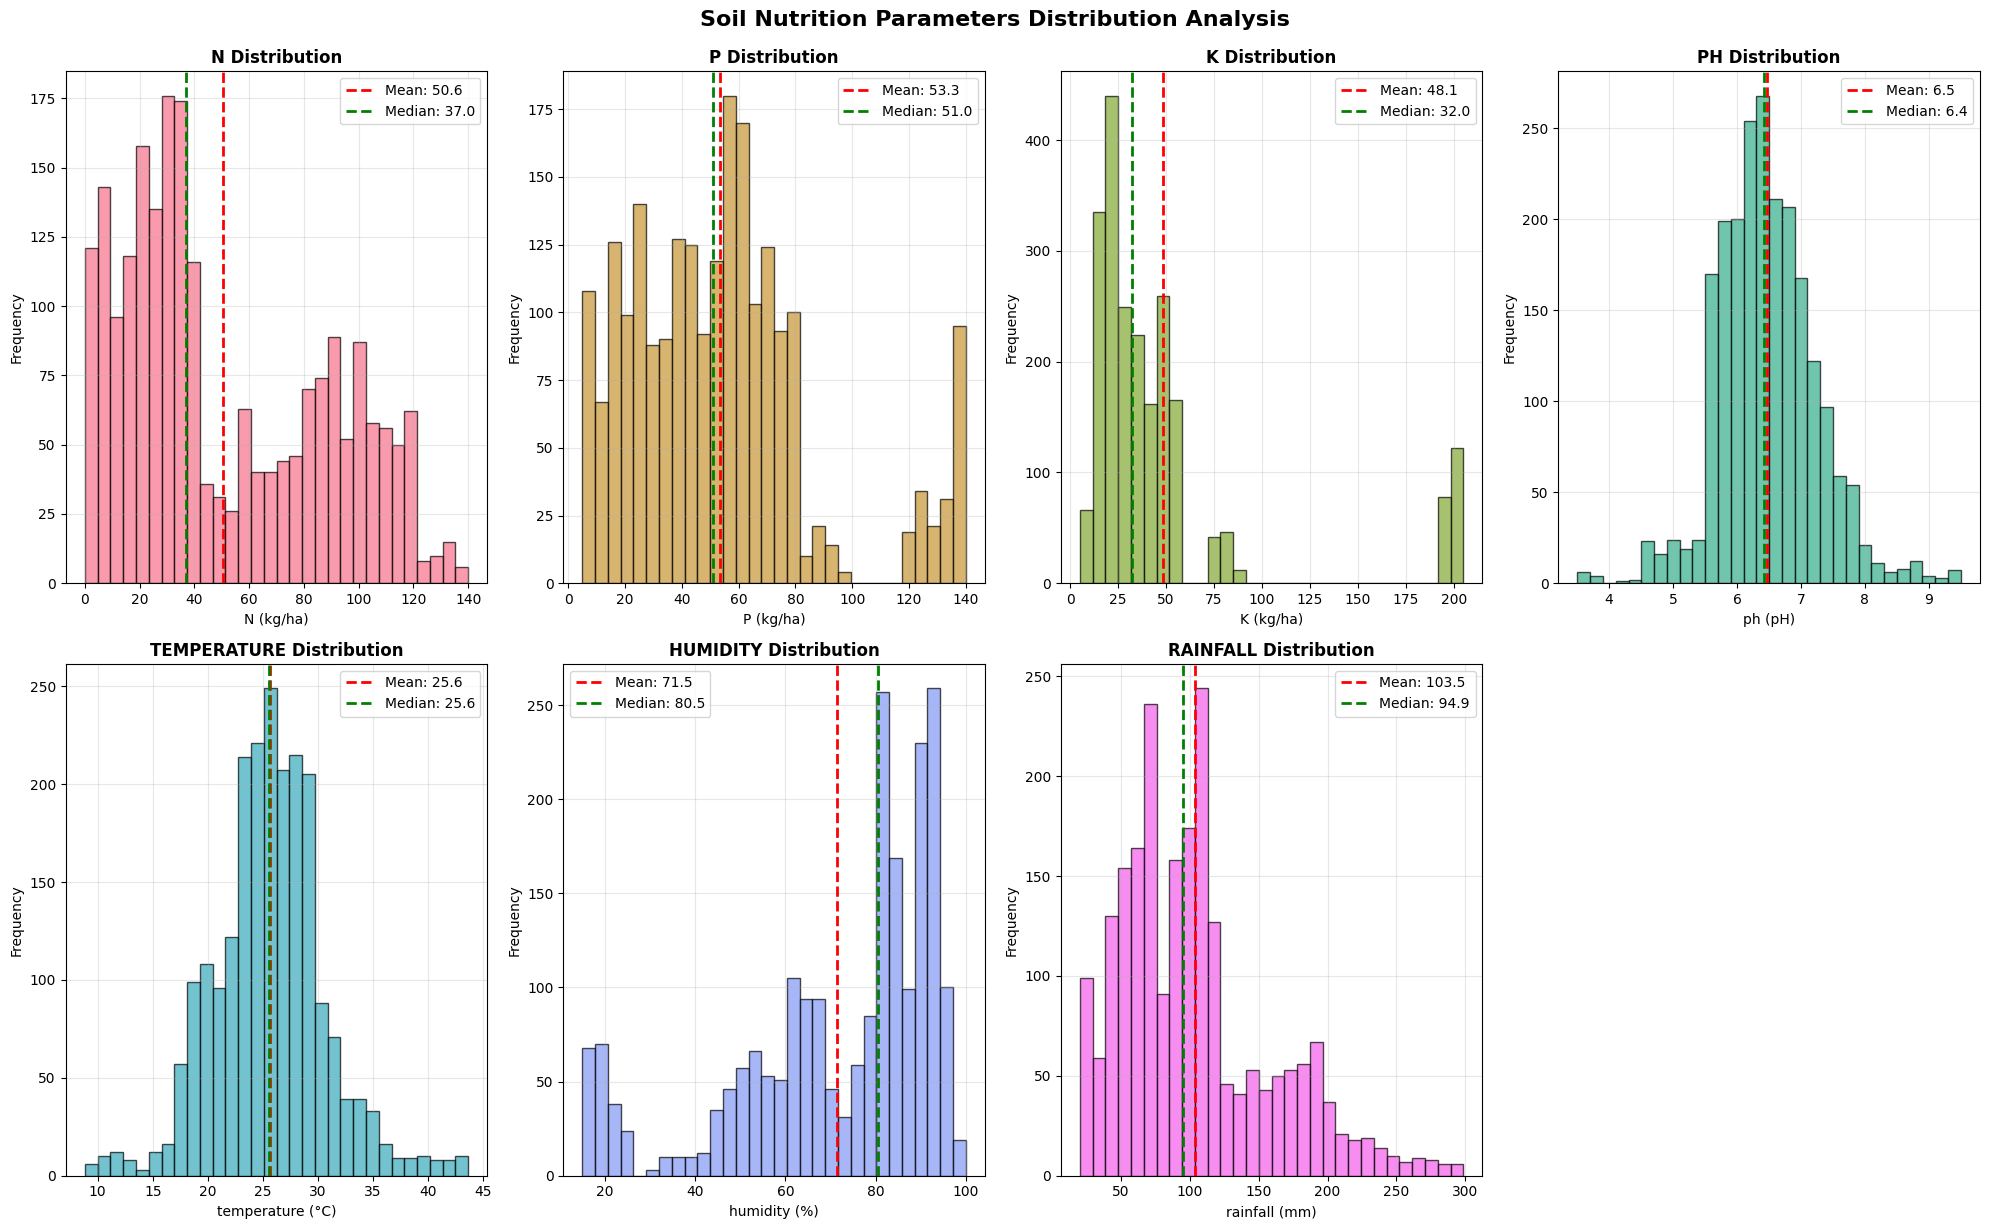

STATISTICAL INSIGHTS:
N            | Mean:   50.6 | Std:   36.9 | Skew:  0.51 | Kurt: -1.06
P            | Mean:   53.3 | Std:   32.8 | Skew:  0.99 | Kurt:  0.80
K            | Mean:   48.1 | Std:   50.6 | Skew:  2.38 | Kurt:  4.45
PH           | Mean:    6.5 | Std:    0.8 | Skew:  0.26 | Kurt:  1.52
TEMPERATURE  | Mean:   25.6 | Std:    5.1 | Skew:  0.18 | Kurt:  1.23
HUMIDITY     | Mean:   71.5 | Std:   22.3 | Skew: -1.09 | Kurt:  0.30
RAINFALL     | Mean:  103.5 | Std:   55.0 | Skew:  0.97 | Kurt:  0.61


In [23]:
# 1. Distribution Analysis
print("1. DISTRIBUTION ANALYSIS:")

# Create comprehensive distribution plots
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
axes = axes.ravel()

for i, col in enumerate(df_clean.columns):
    # Histogram with statistics
    axes[i].hist(df_clean[col], bins=30, alpha=0.7, color=sns.color_palette("husl", 7)[i], edgecolor='black')
    axes[i].axvline(df_clean[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_clean[col].mean():.1f}')
    axes[i].axvline(df_clean[col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_clean[col].median():.1f}')
    axes[i].set_title(f'{col.upper()} Distribution', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(f'{col} ({"kg/ha" if col in ["N", "P", "K"] else "°C" if col == "temperature" else "%" if col == "humidity" else "mm" if col == "rainfall" else "pH"})')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].grid(alpha=0.3)

# Remove empty subplot
fig.delaxes(axes[7])

plt.tight_layout()
plt.suptitle('Soil Nutrition Parameters Distribution Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Statistical summary
print("STATISTICAL INSIGHTS:")
for col in df_clean.columns:
    skewness = df_clean[col].skew()
    kurtosis = df_clean[col].kurtosis()
    print(f"{col.upper():12} | Mean: {df_clean[col].mean():6.1f} | Std: {df_clean[col].std():6.1f} | Skew: {skewness:5.2f} | Kurt: {kurtosis:5.2f}")

2. CORRELATION ANALYSIS:


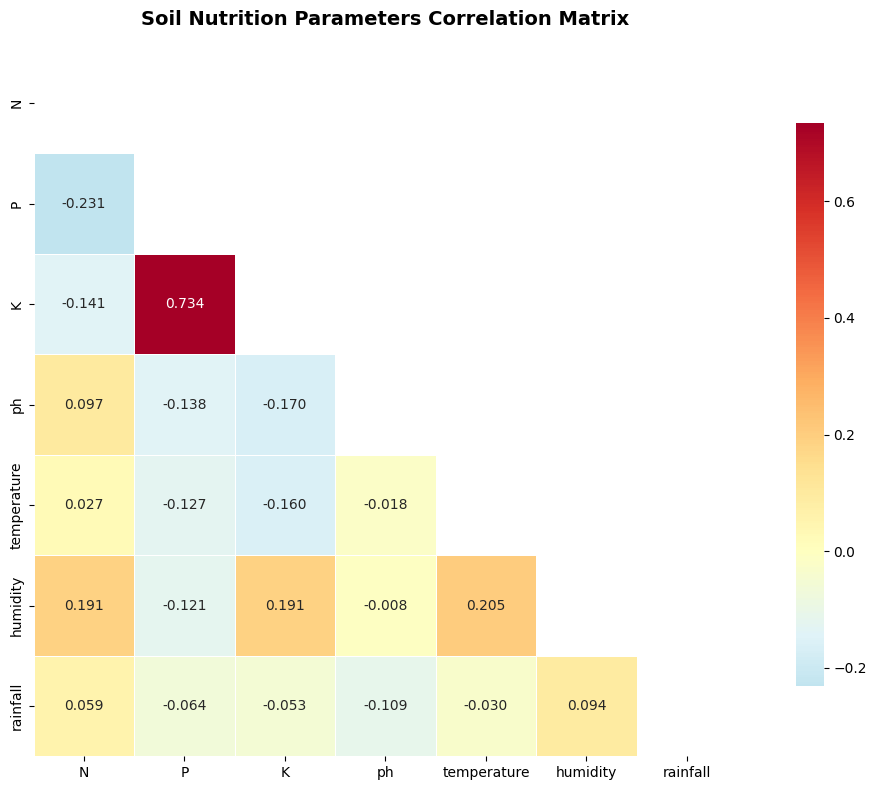

STRONG CORRELATIONS (|r| > 0.3):
P            ↔ K            | r =  0.734
Found 1 strong correlations to consider in modeling


In [24]:
# 2. Correlation Analysis
print("2. CORRELATION ANALYSIS:")

# Calculate correlation matrix
correlation_matrix = df_clean.corr()

# Create correlation heatmap
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.3f')
plt.title('Soil Nutrition Parameters Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identify strong correlations
print(f"STRONG CORRELATIONS (|r| > 0.3):")
strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:
            strong_corr.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))
            print(f"{correlation_matrix.columns[i]:12} ↔ {correlation_matrix.columns[j]:12} | r = {corr_val:6.3f}")

if not strong_corr:
    print("No strong correlations found (|r| > 0.3)")
else:
    print(f"Found {len(strong_corr)} strong correlations to consider in modeling")

3. MICRONUTRIENT DEFICIENCY PATTERN ANALYSIS:
DEFICIENCY PATTERN ANALYSIS RESULTS:
Zinc Deficiency      | Count:  468 | Percentage:  21.3%
Iron Deficiency      | Count:   13 | Percentage:   0.6%
Boron Deficiency     | Count:    0 | Percentage:   0.0%
Multiple Deficiency  | Count:  151 | Percentage:   6.9%


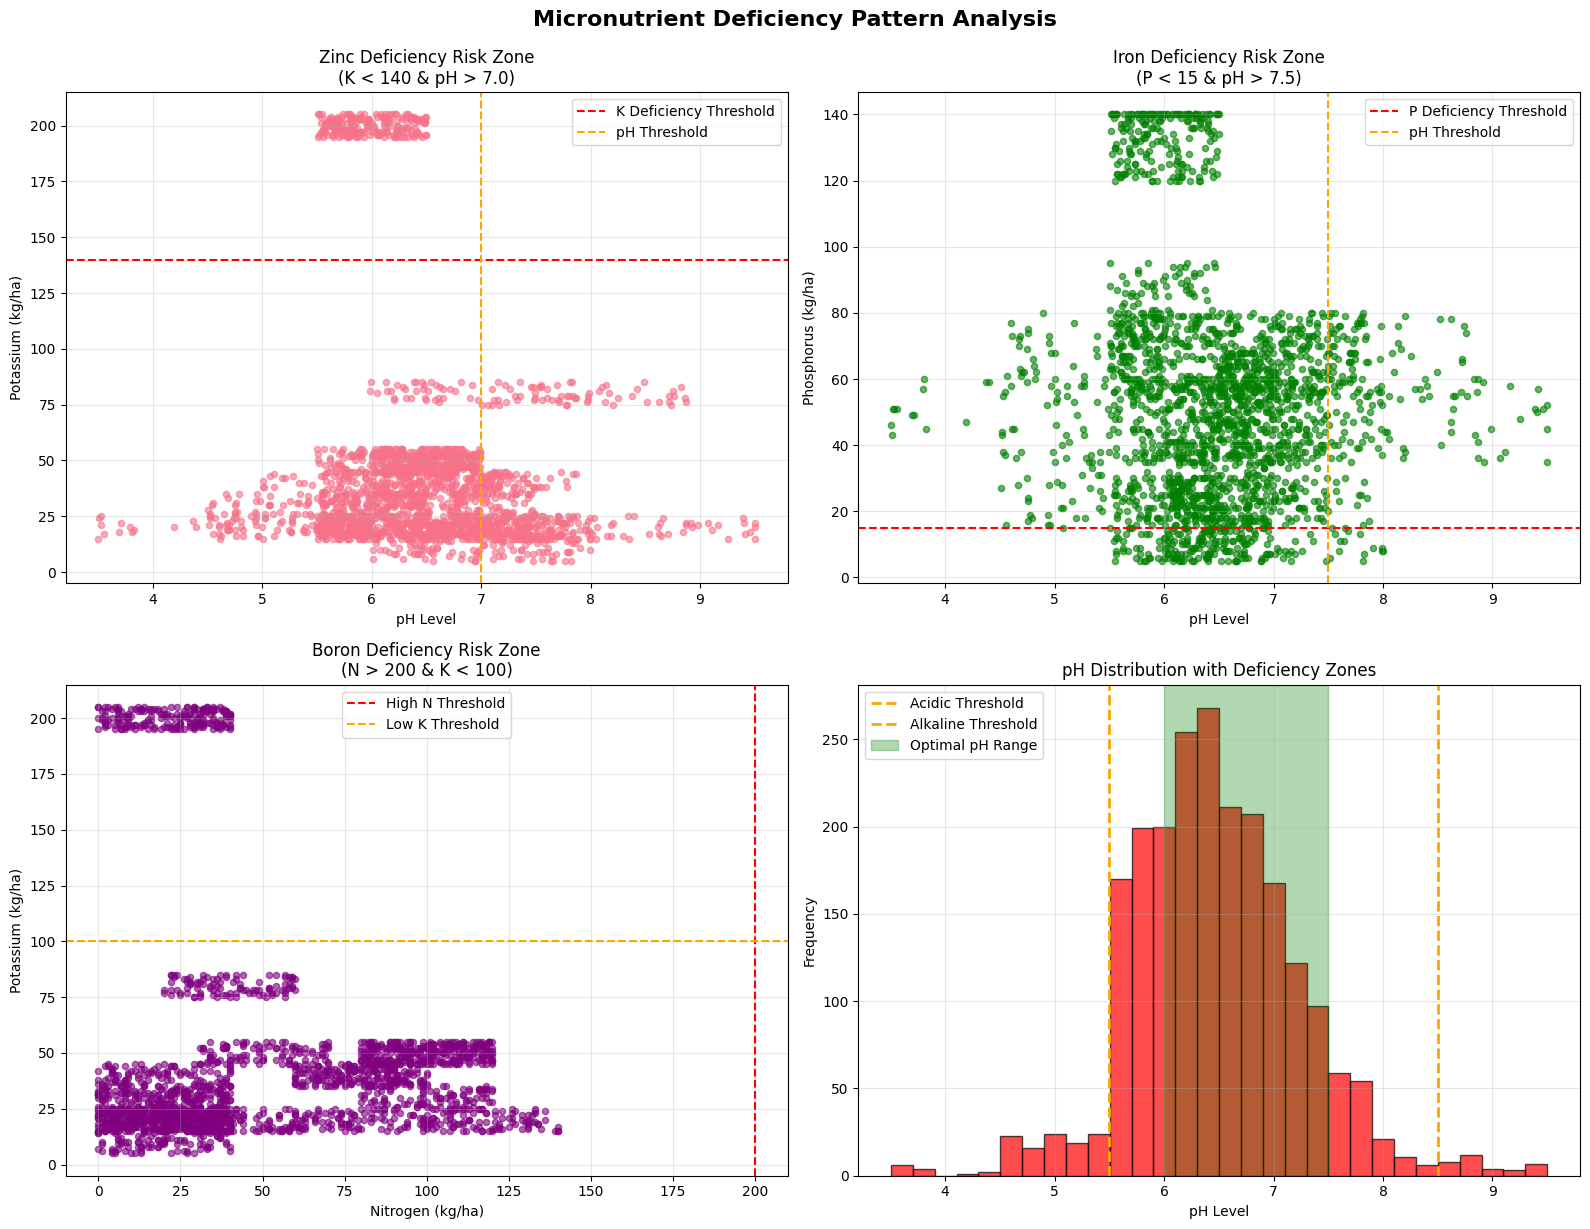

In [25]:
# 3. Micronutrient Deficiency Pattern Analysis
print("3. MICRONUTRIENT DEFICIENCY PATTERN ANALYSIS:")

# Define deficiency thresholds based on agricultural research
thresholds = {
    'zinc_deficiency': {'K_threshold': 140, 'pH_threshold': 7.0},
    'iron_deficiency': {'P_threshold': 15, 'pH_threshold': 7.5},
    'boron_deficiency': {'N_threshold': 200, 'K_threshold': 100},
    'multiple_deficiency': {'pH_low': 5.5, 'pH_high': 8.5}
}

# Analyze deficiency patterns
deficiency_analysis = {}

# Zinc deficiency analysis (K < 140 and pH > 7.0)
zinc_def = (df_clean['K'] < thresholds['zinc_deficiency']['K_threshold']) & \
           (df_clean['ph'] > thresholds['zinc_deficiency']['pH_threshold'])
deficiency_analysis['zinc_deficiency'] = {
    'count': zinc_def.sum(),
    'percentage': (zinc_def.sum() / len(df_clean)) * 100
}

# Iron deficiency analysis (P < 15 and pH > 7.5)
iron_def = (df_clean['P'] < thresholds['iron_deficiency']['P_threshold']) & \
           (df_clean['ph'] > thresholds['iron_deficiency']['pH_threshold'])
deficiency_analysis['iron_deficiency'] = {
    'count': iron_def.sum(),
    'percentage': (iron_def.sum() / len(df_clean)) * 100
}

# Boron deficiency analysis (N > 200 and K < 100)
boron_def = (df_clean['N'] > thresholds['boron_deficiency']['N_threshold']) & \
            (df_clean['K'] < thresholds['boron_deficiency']['K_threshold'])
deficiency_analysis['boron_deficiency'] = {
    'count': boron_def.sum(),
    'percentage': (boron_def.sum() / len(df_clean)) * 100
}

# Multiple deficiency analysis (pH < 5.5 or pH > 8.5)
multiple_def = (df_clean['ph'] < thresholds['multiple_deficiency']['pH_low']) | \
               (df_clean['ph'] > thresholds['multiple_deficiency']['pH_high'])
deficiency_analysis['multiple_deficiency'] = {
    'count': multiple_def.sum(),
    'percentage': (multiple_def.sum() / len(df_clean)) * 100
}

# Display deficiency analysis results
print(f"DEFICIENCY PATTERN ANALYSIS RESULTS:")
print(f"{'='*50}")
total_samples = len(df_clean)
for deficiency, stats in deficiency_analysis.items():
    print(f"{deficiency.replace('_', ' ').title():20} | Count: {stats['count']:4d} | Percentage: {stats['percentage']:5.1f}%")

# Visualize deficiency patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Zinc deficiency scatter plot
axes[0, 0].scatter(df_clean['ph'], df_clean['K'], alpha=0.6, s=20)
axes[0, 0].axhline(140, color='red', linestyle='--', label='K Deficiency Threshold')
axes[0, 0].axvline(7.0, color='orange', linestyle='--', label='pH Threshold')
axes[0, 0].set_xlabel('pH Level')
axes[0, 0].set_ylabel('Potassium (kg/ha)')
axes[0, 0].set_title('Zinc Deficiency Risk Zone\n(K < 140 & pH > 7.0)')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Iron deficiency scatter plot
axes[0, 1].scatter(df_clean['ph'], df_clean['P'], alpha=0.6, s=20, color='green')
axes[0, 1].axhline(15, color='red', linestyle='--', label='P Deficiency Threshold')
axes[0, 1].axvline(7.5, color='orange', linestyle='--', label='pH Threshold')
axes[0, 1].set_xlabel('pH Level')
axes[0, 1].set_ylabel('Phosphorus (kg/ha)')
axes[0, 1].set_title('Iron Deficiency Risk Zone\n(P < 15 & pH > 7.5)')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Boron deficiency scatter plot
axes[1, 0].scatter(df_clean['N'], df_clean['K'], alpha=0.6, s=20, color='purple')
axes[1, 0].axvline(200, color='red', linestyle='--', label='High N Threshold')
axes[1, 0].axhline(100, color='orange', linestyle='--', label='Low K Threshold')
axes[1, 0].set_xlabel('Nitrogen (kg/ha)')
axes[1, 0].set_ylabel('Potassium (kg/ha)')
axes[1, 0].set_title('Boron Deficiency Risk Zone\n(N > 200 & K < 100)')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# pH distribution with deficiency zones
axes[1, 1].hist(df_clean['ph'], bins=30, alpha=0.7, color='red', edgecolor='black')
axes[1, 1].axvline(5.5, color='orange', linestyle='--', linewidth=2, label='Acidic Threshold')
axes[1, 1].axvline(8.5, color='orange', linestyle='--', linewidth=2, label='Alkaline Threshold')
axes[1, 1].axvspan(6.0, 7.5, alpha=0.3, color='green', label='Optimal pH Range')
axes[1, 1].set_xlabel('pH Level')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('pH Distribution with Deficiency Zones')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.suptitle('Micronutrient Deficiency Pattern Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.show()

##  4. Feature Engineering

### Feature Engineering Goals:
1. **Create deficiency indicators** based on soil parameter combinations
2. **Generate soil health scores** for comprehensive assessment
3. **Build nutrient ratios** that indicate micronutrient availability
4. **Prepare target variables** for model training in Week 2

In [26]:
# Create feature-engineered dataset
df_features = df_clean.copy()

print("1. CREATING NUTRIENT RATIO FEATURES:")

# 1. Nutrient Ratios (important for micronutrient availability)
df_features['N_P_ratio'] = df_features['N'] / (df_features['P'] + 1)  # +1 to avoid division by zero
df_features['N_K_ratio'] = df_features['N'] / (df_features['K'] + 1)
df_features['P_K_ratio'] = df_features['P'] / (df_features['K'] + 1)

print(f"Created nutrient ratio features: N_P_ratio, N_K_ratio, P_K_ratio")

print("2. CREATING SOIL HEALTH INDICATORS:")

# 2. Soil Health Score (0-1 scale)
def calculate_soil_health_score(row):
    # Normalize each parameter to 0-1 scale
    n_score = min(row['N'] / 200, 1.0)  # Optimal N around 200
    p_score = min(row['P'] / 40, 1.0)   # Optimal P around 40
    k_score = min(row['K'] / 200, 1.0)  # Optimal K around 200

    # pH score (optimal range 6.0-7.5)
    if 6.0 <= row['ph'] <= 7.5:
        ph_score = 1.0
    else:
        ph_score = max(0, 1 - abs(row['ph'] - 6.75) / 3)

    # Weighted average
    health_score = (n_score * 0.25 + p_score * 0.25 + k_score * 0.25 + ph_score * 0.25)
    return round(health_score, 3)

df_features['soil_health_score'] = df_features.apply(calculate_soil_health_score, axis=1)
print(f"Created soil health score (0-1 scale)")

print("3. CREATING DEFICIENCY TARGET VARIABLES:")

# 3. Deficiency Indicators (target variables for modeling)
df_features['zinc_deficiency'] = ((df_features['K'] < 140) & (df_features['ph'] > 7.0)).astype(int)
df_features['iron_deficiency'] = ((df_features['P'] < 15) & (df_features['ph'] > 7.5)).astype(int)
df_features['boron_deficiency'] = ((df_features['N'] > 200) & (df_features['K'] < 100)).astype(int)
df_features['multiple_deficiency'] = ((df_features['ph'] < 5.5) | (df_features['ph'] > 8.5)).astype(int)

# Overall deficiency indicator
df_features['any_deficiency'] = (
    (df_features['zinc_deficiency'] == 1) |
    (df_features['iron_deficiency'] == 1) |
    (df_features['boron_deficiency'] == 1) |
    (df_features['multiple_deficiency'] == 1)
).astype(int)

print(f"Created deficiency target variables:")
for col in ['zinc_deficiency', 'iron_deficiency', 'boron_deficiency', 'multiple_deficiency', 'any_deficiency']:
    count = df_features[col].sum()
    percentage = (count / len(df_features)) * 100
    print(f"{col:20}: {count:4d} samples ({percentage:5.1f}%)")

print("4. CREATING ENVIRONMENTAL FEATURES:")

# 4. Environmental stress indicators
df_features['temperature_stress'] = ((df_features['temperature'] < 15) | (df_features['temperature'] > 35)).astype(int)
df_features['moisture_stress'] = ((df_features['humidity'] < 40) | (df_features['rainfall'] < 50)).astype(int)

print(f"Created environmental stress indicators")

# Display feature engineering summary
print("FEATURE ENGINEERING SUMMARY:")
print(f"Original features: {len(df_clean.columns)}")
print(f"Engineered features: {len(df_features.columns) - len(df_clean.columns)}")
print(f"Total features: {len(df_features.columns)}")

new_features = [col for col in df_features.columns if col not in df_clean.columns]
print(f"New features created: {new_features}")

# Save feature-engineered dataset
df_features.to_csv('soil_nutrition_features.csv', index=False)
print("Feature-engineered dataset saved as 'soil_nutrition_features.csv'")

1. CREATING NUTRIENT RATIO FEATURES:
Created nutrient ratio features: N_P_ratio, N_K_ratio, P_K_ratio
2. CREATING SOIL HEALTH INDICATORS:
Created soil health score (0-1 scale)
3. CREATING DEFICIENCY TARGET VARIABLES:
Created deficiency target variables:
zinc_deficiency     :  468 samples ( 21.3%)
iron_deficiency     :   13 samples (  0.6%)
boron_deficiency    :    0 samples (  0.0%)
multiple_deficiency :  151 samples (  6.9%)
any_deficiency      :  585 samples ( 26.6%)
4. CREATING ENVIRONMENTAL FEATURES:
Created environmental stress indicators
FEATURE ENGINEERING SUMMARY:
Original features: 7
Engineered features: 11
Total features: 18
New features created: ['N_P_ratio', 'N_K_ratio', 'P_K_ratio', 'soil_health_score', 'zinc_deficiency', 'iron_deficiency', 'boron_deficiency', 'multiple_deficiency', 'any_deficiency', 'temperature_stress', 'moisture_stress']
Feature-engineered dataset saved as 'soil_nutrition_features.csv'
